In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sep
from matplotlib import rcParams
from astropy.io import fits
import scipy
import astropy



In [3]:
rcParams['figure.figsize']=[10., 8.]

In [15]:
data = astropy.io.fits.open('image.fits')


image_data = fits.getdata('image.fits')
print(type(image_data))
print(image_data.shape)


data.close()


<class 'numpy.ndarray'>
(256, 256)


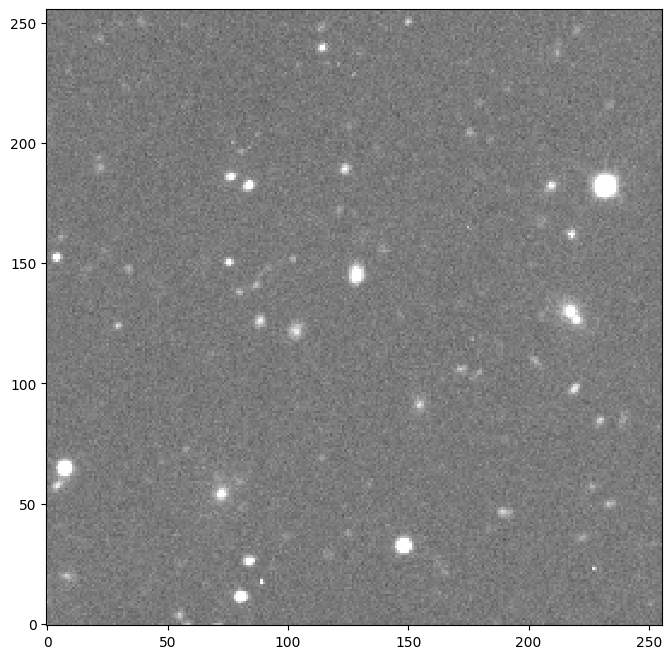

In [44]:
m, s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar
plt.savefig("one.png",bbox_inches = 'tight', dpi = 600)

In [22]:
bkg = sep.Background(image_data)

In [23]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [24]:
bkg_image = bkg.back()

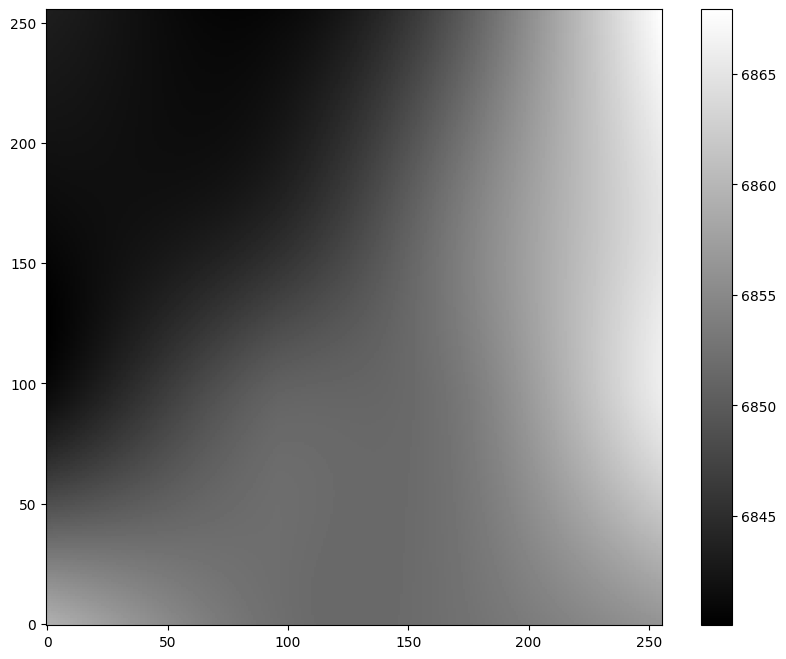

In [28]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("two.png",bbox_inches = 'tight', dpi = 600)

In [29]:
bkg_rms = bkg.rms()

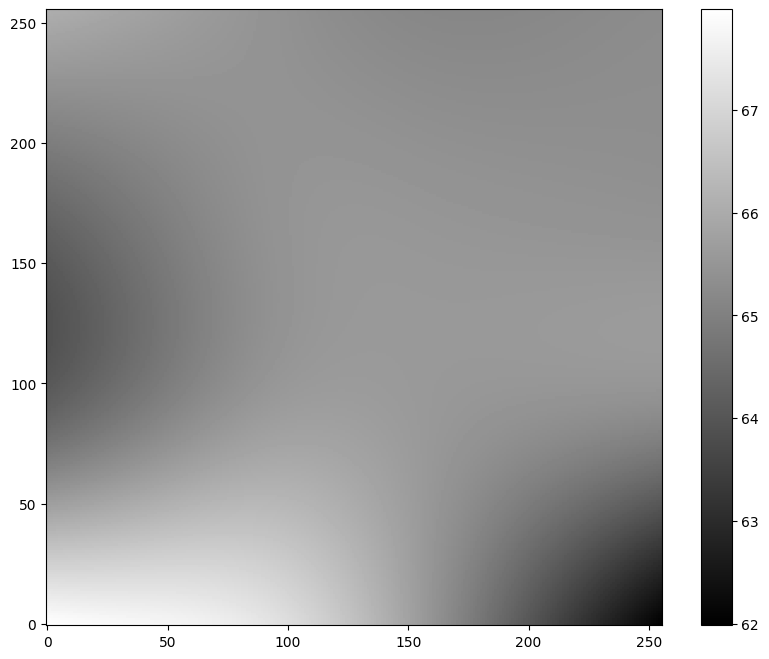

In [45]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("three.png",bbox_inches = 'tight', dpi = 600)

In [32]:
data_sub = image_data - bkg

In [34]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [35]:
#how many objkects were detected
len(objects)

68

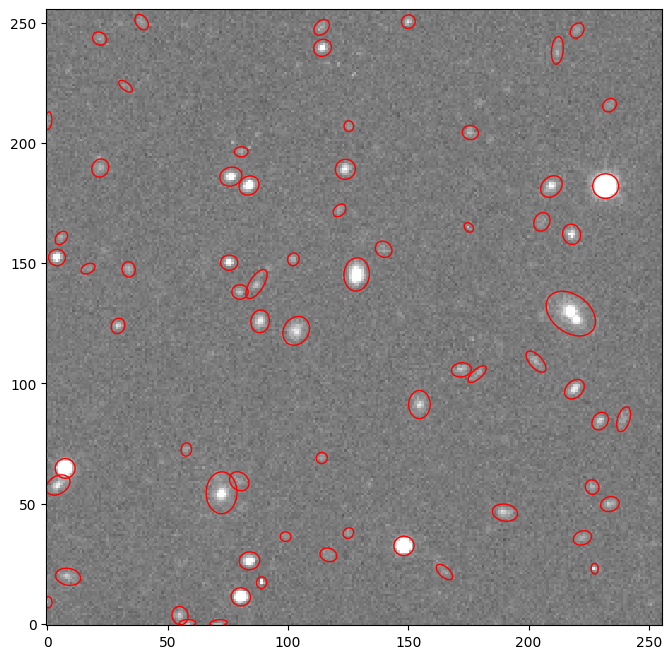

In [47]:
from matplotlib.patches import Ellipse

#plot background- subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap = 'grey', vmin = m-s, vmax = m+s, origin = 'lower')

#plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy = (objects['x'][i], objects['y'][i]), width=6*objects['a'][i], height = 6*objects['b'][i], angle=objects['theta'][i] * 180. / np.pi)

    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("four.png",bbox_inches = 'tight', dpi = 600)



In [39]:
#availible fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [40]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain =1.0)

In [42]:
#show the first 10 objects results:
for i in range(10):
    print('object {:d}: flux = {:f} +/- {:f}'.format(i, flux[i], fluxerr[i]))
          

object 0: flux = 2249.157852 +/- 291.027799
object 1: flux = 3092.217500 +/- 291.592199
object 2: flux = 5949.861113 +/- 356.561993
object 3: flux = 1851.419824 +/- 295.028805
object 4: flux = 72736.380312 +/- 440.172199
object 5: flux = 3860.756895 +/- 352.163163
object 6: flux = 6418.902715 +/- 357.458957
object 7: flux = 2210.714238 +/- 350.791233
object 8: flux = 2741.609297 +/- 352.277749
object 9: flux = 20916.877363 +/- 376.966141
